# Natrual Language Processing (NLP)

**Resources**: 

* https://en.wikipedia.org/wiki/Natural_language_processing
* https://hbr.org/2022/04/the-power-of-natural-language-processing
* https://deeplearning.ai/resources/natural-language-processing/

**Datasets**:

* https://archive.ics.uci.edu/datasets

### Import Libraries

In [39]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk

In [ ]:
### nltk.download_shell()

### Helper Functions

## 1. Frame the Problem

Based on the contents of an email, we want to predict whether the message is spam or not

## 2. EDA

In [5]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
for mess_no, message in enumerate(messages[:10]):
    print (mess_no, message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [22]:
messages = pd.read_csv('SMSSpamCollection', sep="\t", names=['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [24]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [26]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

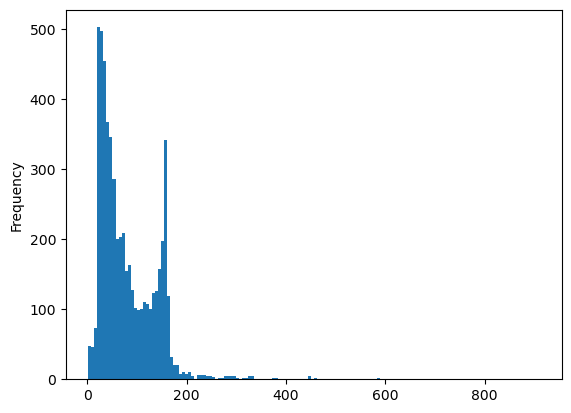

In [31]:
messages['length'].plot.hist(bins=150)

In [32]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [36]:
messages[messages['length'] == 910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

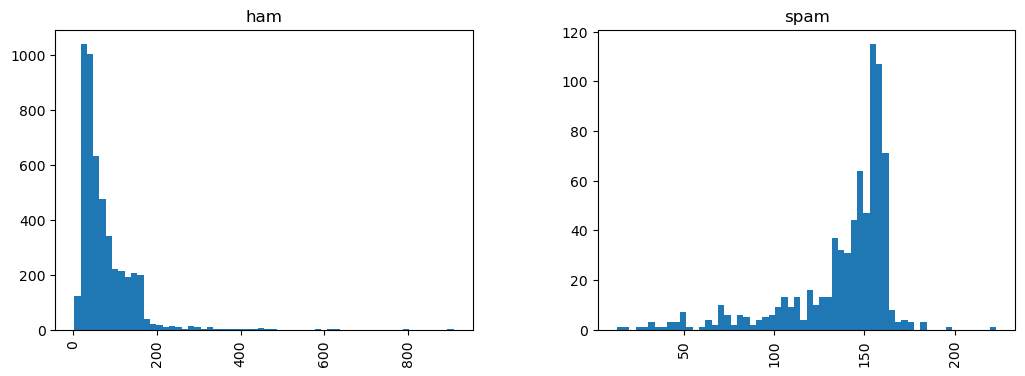

In [37]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

## 3. Prepare the Data

### Clean up messages to only highlight important words

In [41]:
import string

In [42]:
mess = "Sample message! Notice: it has punctuation"

nopunc = [c for c in mess if c not in string.punctuation]

nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [43]:
from nltk.corpus import stopwords

In [44]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [47]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [49]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [56]:
def text_process(message):
    """
    1. Remove punctuation
    2. Remove stop words
    3. Remove list of clean words
    """
    nopunc = [c for c in message if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [57]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Vectorize Strings

1. Count how many times a word appears in each message (term frequency)
2. Weight the counts, so that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vecotrs to unit length, to abstract the original text length (L2 norm)

#### Count how many times a word appears in each message (term frequency)

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [63]:
print(len(bow_transformer.vocabulary_))

11425


In [65]:
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [67]:
bow4 = bow_transformer.transform([mess4])

In [68]:
print(bow4.shape)

(1, 11425)


In [70]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [71]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [72]:
messages_bow = bow_transformer.transform(messages['message'])

In [73]:
print(f"Shape of Sparse Matrix: {messages_bow.shape}")

Shape of Sparse Matrix: (5572, 11425)


In [75]:
sparcity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print(f"Sparcity: {sparcity}")
print(f"Sparcity (Rounded): {round(sparcity)}")

Sparcity: 0.07940295412668218
Sparcity (Rounded): 0


In [108]:
from sklearn.feature_extraction.text import TfidfTransformer

In [78]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [80]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [81]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [82]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

## 4. Select & Train Models

In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [87]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [88]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [89]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [102]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [103]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1695c43a0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [104]:
predictions = pipeline.predict(msg_test)

In [105]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1439
        spam       0.99      0.76      0.86       233

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672

